In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [5]:
disney_data = pd.read_csv('dataset/disney_movies_total_gross.csv')
disney_data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [6]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [7]:
disney_data['release_date'] = pd.to_datetime(disney_data['release_date'])

In [8]:
disney_data['year'] = disney_data['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

In [9]:
disney_data.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
year                                object
dtype: object

In [10]:
disney_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_gross,579.0,6.470179e+07,9.301301e+07,0.0,12788864.0,30702446.0,75709033.0,9.366622e+08
inflation_adjusted_gross,579.0,1.187625e+08,2.860853e+08,0.0,22741232.0,55159783.0,119202000.0,5.228953e+09


In [11]:
print('the best total gross', disney_data['total_gross'].max(),
      '\nThe worse total gross:', disney_data['total_gross'].min())

the best total gross 936662225 
The worse total gross: 0


In [12]:
print('the best inflation adjusted gross', disney_data['inflation_adjusted_gross'].max(),'\nThe worse inflation_adjusted_gross:', disney_data['inflation_adjusted_gross'].min())

the best inflation adjusted gross 5228953251 
The worse inflation_adjusted_gross: 0


Text(0.5, 0, 'rating')

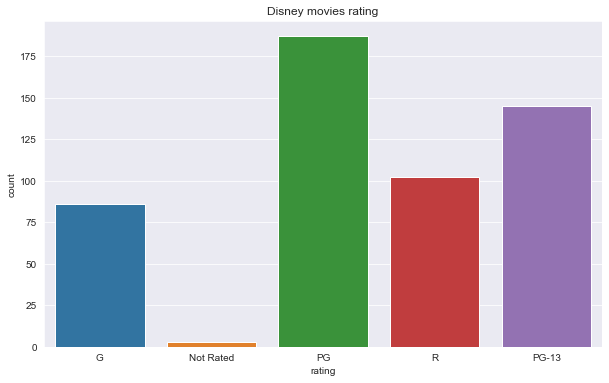

In [13]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies rating')
sns.countplot(x='mpaa_rating', data=disney_data)
plt.xlabel('rating')

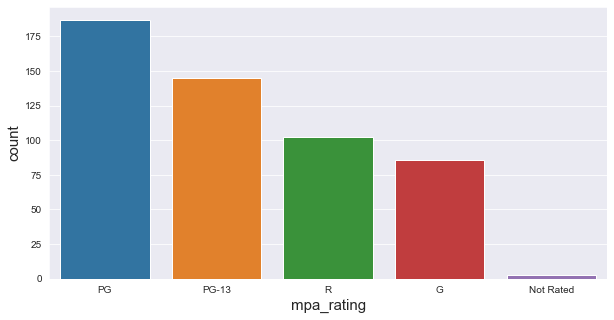

In [31]:
mpa_label = disney_data.mpaa_rating.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(mpa_label.index, mpa_label);
plt.xlabel('mpa_rating', fontsize=15)
plt.ylabel('count', fontsize=15);

<AxesSubplot:title={'center':'Disney movies genres'}, xlabel='count', ylabel='genre'>

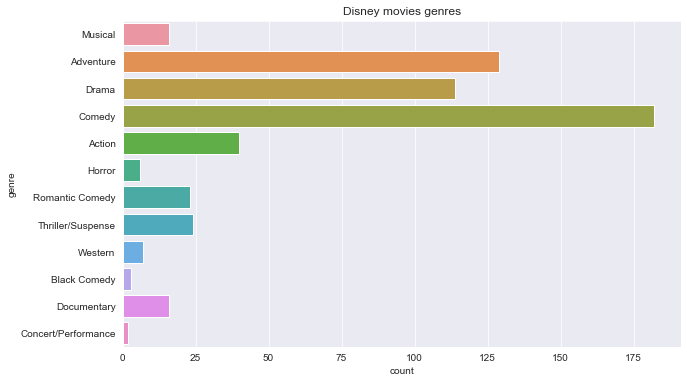

In [14]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies genres')
sns.countplot(y='genre', data=disney_data)

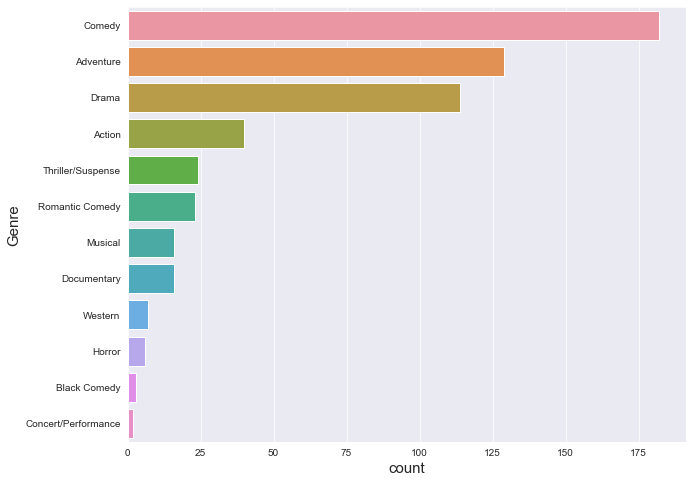

In [32]:
genre_label = disney_data.genre.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(genre_label, genre_label.index);
plt.ylabel('Genre', fontsize=15)
plt.xlabel('count', fontsize=15);

<AxesSubplot:title={'center':'Disney movies per year'}, xlabel='year', ylabel='Count'>

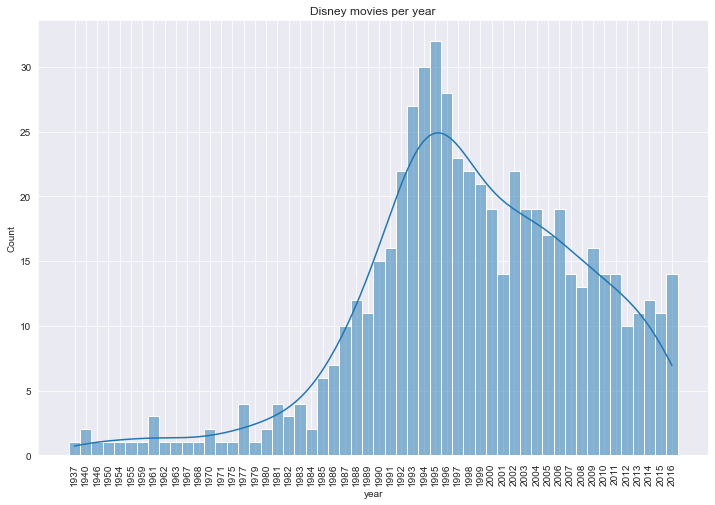

In [15]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Disney movies per year')
sns.histplot(disney_data['year'], kde=True)

<AxesSubplot:title={'center':'Evolution of movies gross with time'}, xlabel='release date', ylabel='total gross'>

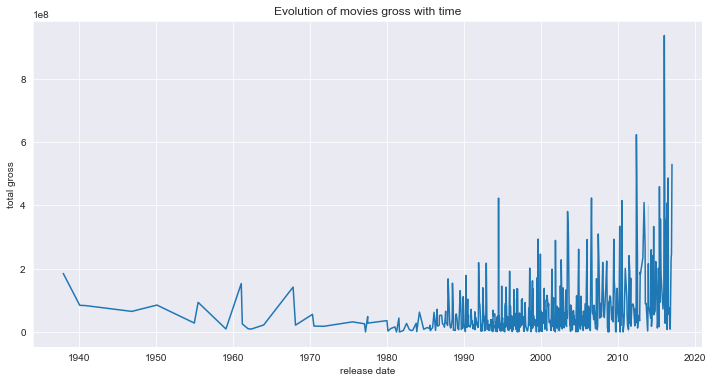

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time')
plt.xlabel('release date')
plt.ylabel('total gross')
sns.lineplot(x='release_date', y='total_gross', data=disney_data)

<AxesSubplot:title={'center':'Evolution of movies gross with time adjusted by inflation'}, xlabel='release date', ylabel='inflation adjusted gross'>

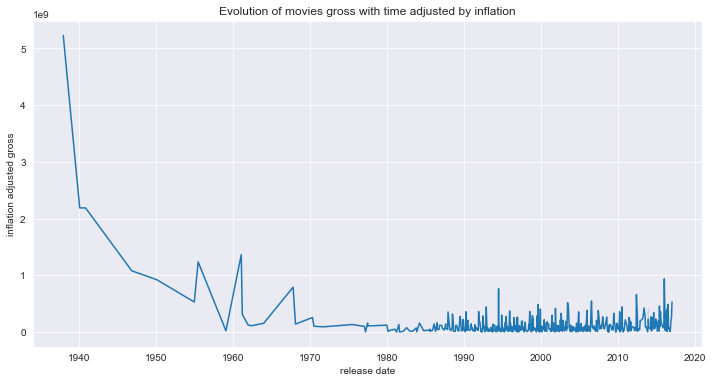

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time adjusted by inflation')
plt.xlabel('release date')
plt.ylabel('inflation adjusted gross')
sns.lineplot(x='release_date', y='inflation_adjusted_gross', data=disney_data)

In [18]:
avg_genre = disney_data.groupby('genre').mean()

<AxesSubplot:xlabel='inflation_adjusted_gross', ylabel='genre'>

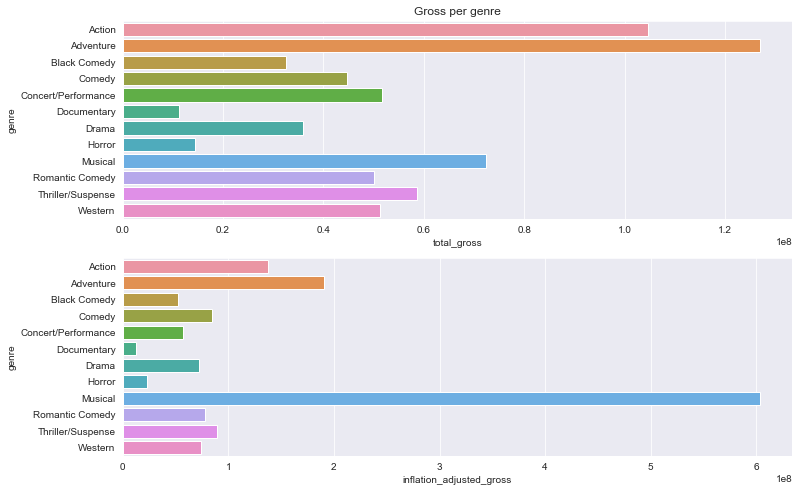

In [19]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre')
sns.barplot(x=avg_genre['total_gross'], y=avg_genre.index)
plt.subplot(2, 1, 2)
sns.barplot(x=avg_genre['inflation_adjusted_gross'], y=avg_genre.index)

In [20]:
sum_genre = disney_data.groupby('genre').sum()

<AxesSubplot:xlabel='inflation_adjusted_gross', ylabel='genre'>

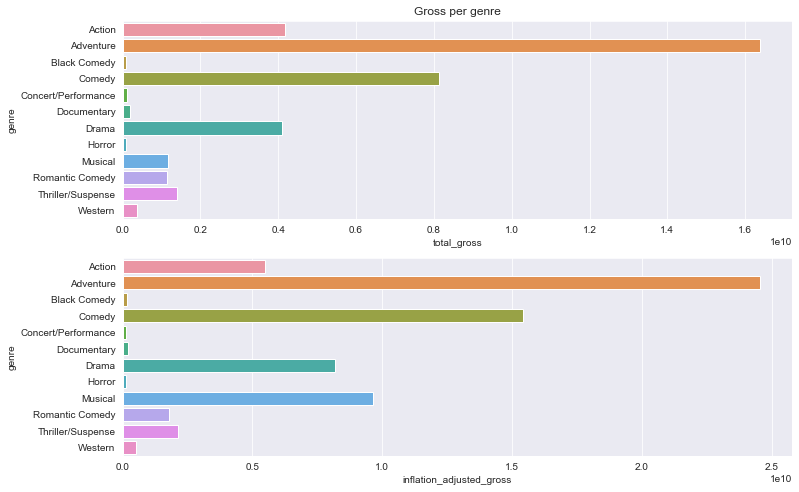

In [21]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre')
sns.barplot(x=sum_genre['total_gross'], y=sum_genre.index)
plt.subplot(2, 1, 2)
sns.barplot(x=sum_genre['inflation_adjusted_gross'], y=sum_genre.index)

In [22]:
disney_data['genre'].value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

<AxesSubplot:xlabel='total_gross', ylabel='genre'>

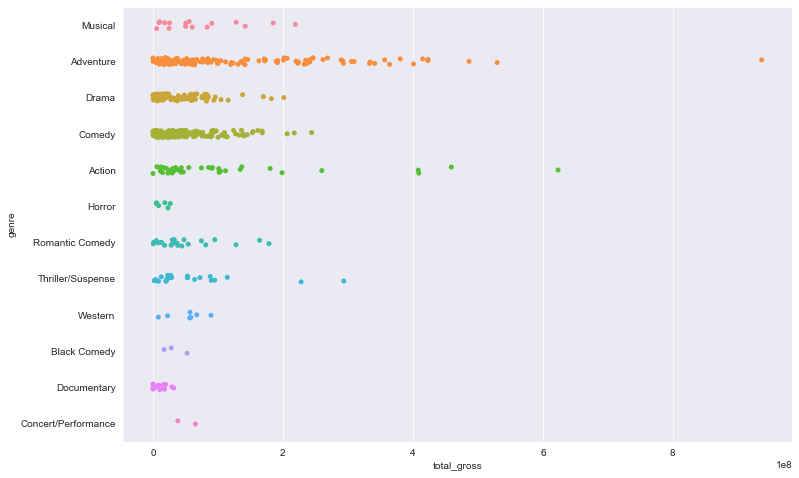

In [23]:
plt.figure(figsize=(12, 8))
sns.stripplot(y='genre', x='total_gross', data=disney_data)

<AxesSubplot:xlabel='inflation_adjusted_gross', ylabel='genre'>

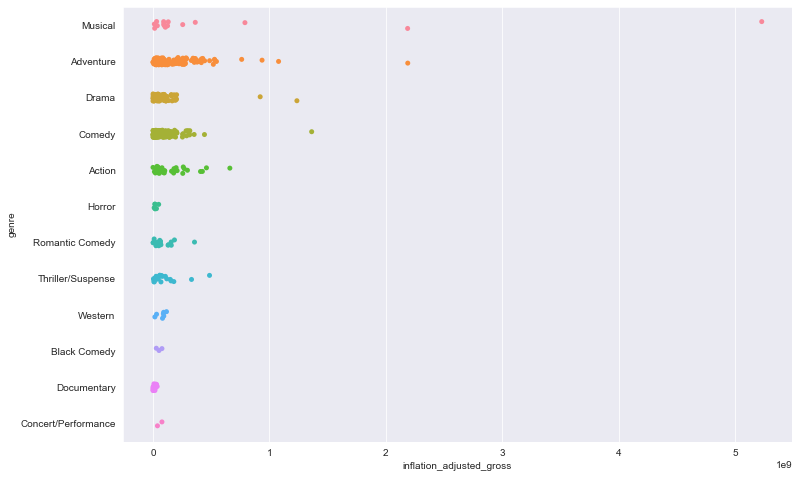

In [24]:
plt.figure(figsize=(12, 8))
sns.stripplot(y='genre', x='inflation_adjusted_gross', data=disney_data)

<AxesSubplot:xlabel='genre', ylabel='inflation_adjusted_gross'>

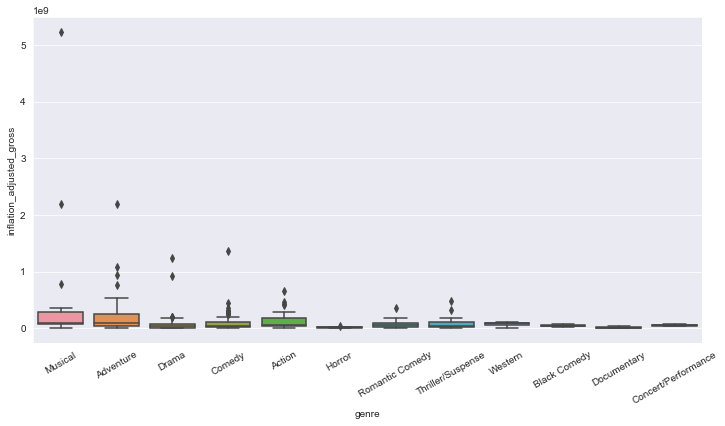

In [25]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=30)
plt.ylabel('inflation adjusted gross')
sns.boxplot(x='genre', y='inflation_adjusted_gross', data=disney_data)

<AxesSubplot:xlabel='inflation_adjusted_gross', ylabel='mpaa_rating'>

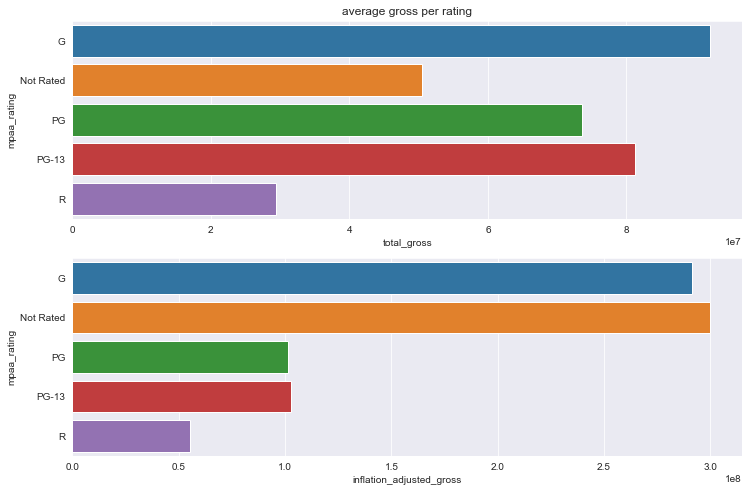

In [26]:
avg_rating = disney_data.groupby('mpaa_rating').mean()
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('average gross per rating')
sns.barplot(x=avg_rating['total_gross'], y=avg_rating.index)
plt.subplot(2, 1, 2)
sns.barplot(x=avg_rating['inflation_adjusted_gross'], y=avg_rating.index)

<AxesSubplot:xlabel='inflation_adjusted_gross', ylabel='mpaa_rating'>

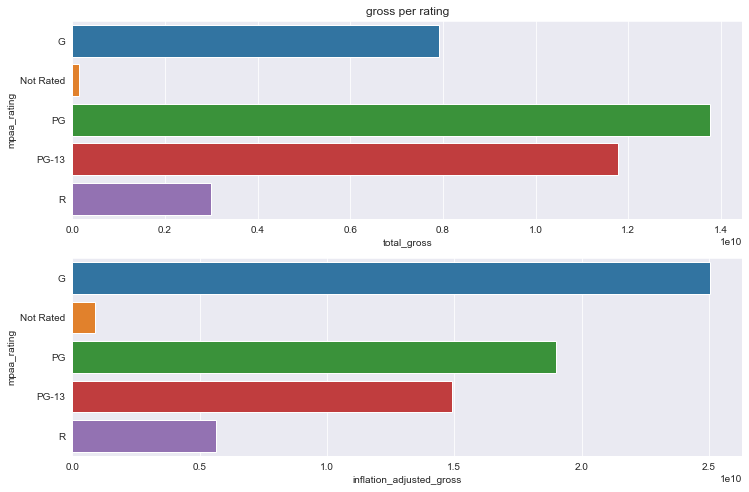

In [27]:
avg_rating = disney_data.groupby('mpaa_rating').sum()
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('gross per rating')
sns.barplot(x=avg_rating['total_gross'], y=avg_rating.index)
plt.subplot(2, 1, 2)
sns.barplot(x=avg_rating['inflation_adjusted_gross'], y=avg_rating.index)

<AxesSubplot:title={'center':'disney movies income'}, xlabel='year', ylabel='income'>

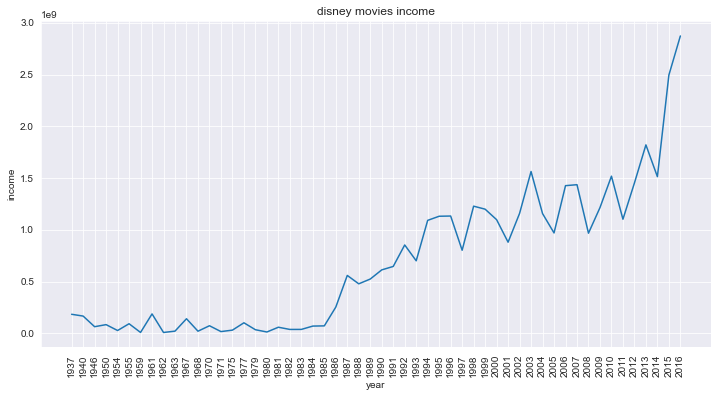

In [28]:
year_income = disney_data.groupby('year').sum()
plt.figure(figsize=(12, 6))
plt.title('disney movies income')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['total_gross'])

<AxesSubplot:title={'center':'disney movies income adjusted'}, xlabel='year', ylabel='inflation adjusted income'>

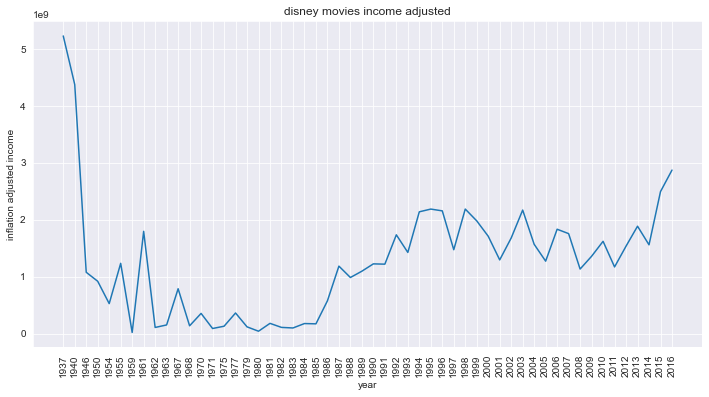

In [29]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income adjusted')
plt.xlabel('year')
plt.ylabel('inflation adjusted income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['inflation_adjusted_gross'])

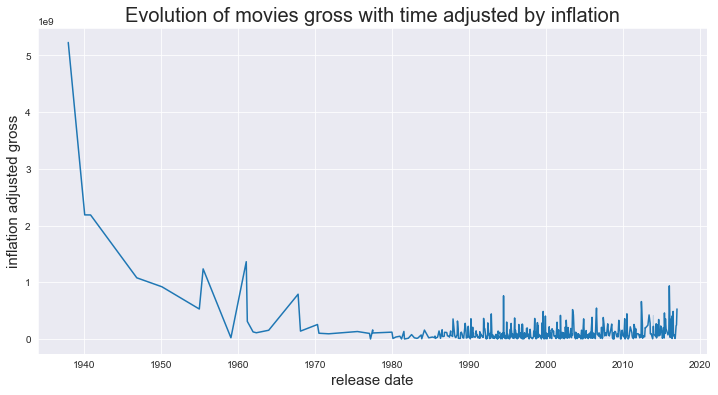

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time adjusted by inflation', fontsize=20)
plt.xlabel('release date', fontsize=15)
plt.ylabel('inflation adjusted gross', fontsize=15)
sns.lineplot(x='release_date', y='inflation_adjusted_gross', data=disney_data);

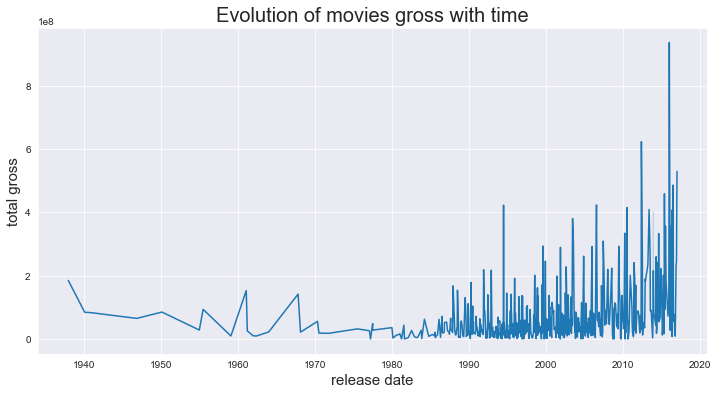

In [34]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time', fontsize=20)
plt.xlabel('release date', fontsize=15)
plt.ylabel('total gross', fontsize=15)
sns.lineplot(x='release_date', y='total_gross', data=disney_data);